Name: Kieran Fitzmaurice

# Gaussian Elimination With Pivoting

Write a function `simple_solve(A, v)` that returns the solution to the matrix equation
$$\mathbf{Ax} = \mathbf{v}\,,$$
where $\mathbf{A}$ is an $N\times N$ matrix, and $\mathbf{v}$ and $\mathbf{x}$ are $N$-dimensional vectors. Unlike the example we did in class, $N$ is not necessarily 3.

Your function should use arrays to represent $\mathbf{A}$ and $\mathbf{v}$, and it should return an array for $\mathbf{x}$. In other words, it should behave like `scipy.linalg.solve`, just using a simpler (but slower) algorithm.

Your function should implement *partial pivoting*.

In [1]:
import numpy as np

def partial_pivot(A,v,i):
    
    imax = i + np.argmax(abs(A[i:,i]))
    
    if i != imax:
        Am = np.copy(A[imax,:])
        vm = np.copy(v[imax])
        A[imax,:] = A[i,:]
        v[imax] = v[i]
        A[i,:] = Am
        v[i] = vm

def simple_solve(Ao,vo):
    
    A = np.copy(Ao.astype(float))
    v = np.copy(vo.astype(float))
    
    N = A.shape[0]
    
    for i in range(0,N):
        
        partial_pivot(A,v,i)
        v[i] = v[i]/A[i][i]
        A[i][:] = A[i][:]/A[i][i]
        
        for j in range(i+1,N):
            
            v[j] = v[j] - A[j][i]*v[i]
            A[j][:] = A[j][:] - A[j][i]*A[i][:]
        
    x = np.zeros(N)
    x[N-1] = v[N-1]
    
    for i in range(1,N):
        ii = (N-1) - i
        x[ii] = v[ii] - np.sum(A[ii][ii+1:]*x[ii+1:])
    
    return(x)


In [2]:
#test 1
#this is the matrix used in the textbook,
#so you can check your work at each step
A = np.array([[2,  1,  4,  1],
              [3,  4, -1, -1],
              [1, -4,  1,  5],
              [2, -2,  1,  3]])
v = np.array([-4, 3, 9, 7])
x = simple_solve(A, v)
print(x) #[ 2. -1. -2.  1.]

[ 2. -1. -2.  1.]


In [3]:
#test 2
#requires pivoting
A = np.array([[ 0,  2, 2, 2, -1, 2],
              [ 6,  6, 6, 0,  1, 2],
              [ 4,  4, 4, 1,  2, 1],
              [ 3,  1, 1, 1,  1, 2],
              [ 2,  0, 0, 3, -4, 3],
              [-2, -4, 4, 3,  2, 1]])
v = np.array([6, 12, 4, 3, 1, 2])
x = simple_solve(A, v)
print(x) #[-1.16666667  0.46031746  1.50793651 -2.65873016 -0.0952381   3.64285714]

[-1.16666667  0.46031746  1.50793651 -2.65873016 -0.0952381   3.64285714]


# Circuit Network 1

(Adapted from textbook exercise 6.5)

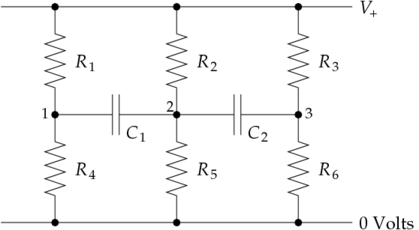

The voltage $V_+$ is time-varying and sinusoidal of the form $V_+ = x_+e^{\mathrm{i}\omega t}$ with $x_+$ a constant. The resistors in the circuit can be treated using Ohm's law as usual. For the capacitors the charge $Q$ and voltage $V$ across them are related by the capacitor law $Q=CV$, where $C$ is the capacitance. Differentiating both sides of this expression gives the current $I$ flowing in on one side of the capacitor and out on the
other:
$$I = \frac{dQ}{dt} = C \frac{dV}{dt}\,.$$

Assuming the voltages at the points labeled 1, 2, and 3 are of the form $V_1 = x_1 e^{\mathrm{i}\omega t}$, $V_2 = x_2 e^{\mathrm{i}\omega t}$, and $V_3 = x_3 e^{\mathrm{i}\omega t}$, we can apply Kirchhoff's law at each of the three points, along with Ohm's law and the capacitor law, to find that the constants $x_1$,
$x_2$, and $x_3$ satisfy the equations
$$\begin{align*}
\biggl( {1\over R_1} + {1\over R_4} + \mathrm{i}\omega C_1 \biggr) x_1
  - \mathrm{i}\omega C_1 x_2 &= {x_+\over R_1}\,, \\
- \mathrm{i}\omega C_1 x_1
+ \biggl( {1\over R_2} + {1\over R_5} + \mathrm{i}\omega C_1 + \mathrm{i}\omega C_2
          \biggr) x_2 - \mathrm{i}\omega C_2 x_3 &= {x_+\over R_2}\,, \\
- \mathrm{i}\omega C_2 x_2
+ \biggl( {1\over R_3} + {1\over R_6} + \mathrm{i}\omega C_2 \biggr) x_3
  &= {x_+\over R_3}\,.
\end{align*}$$

- Write a program to solve for $x_1$, $x_2$, and $x_3$ when
$$\begin{align*}
R_1 &= R_3 = R_5 = 1\,\mathrm{k}\Omega\,, \\
R_2 &= R_4 = R_6 = 2\,\mathrm{k}\Omega\,, \\
C_1 &= 1\,\mu\mathrm{F},\qquad C_2 = 0.5\,\mu\mathrm{F}\,, \\
x_+ &= 3\,\mathrm{V},\qquad \omega = 1000\,\mathrm{s}^{-1}\,.
\end{align*}$$

    Notice that the matrix for this problem has complex elements, meaning your solutions may be complex. You will need to define a complex array to hold your values, but you can still use `scipy.linalg.solve` to solve the equations - it works with either real or complex arguments.


- Using your solution, have your program plot the real parts of $V_+(t)$, $V_1(t)$, $V_2(t)$, and $V_3(t)$ on the same graph. Label each of these voltages.

In [4]:
%reset -f

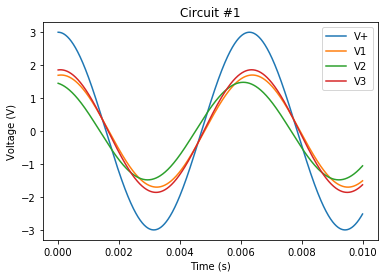

In [5]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Resistance (Ohms)
R1 = 1000
R2 = 2000
R3 = 1000
R4 = 2000
R5 = 1000
R6 = 2000

# Capacitance (Farads)
C1 = 1e-6
C2 = 0.5e-6

# Voltage (Volts)
x_plus = 3

# Frequency (hertz)
w = 1000

A = np.zeros((3,3),dtype = np.complex)
v = np.zeros(3, dtype = np.complex
            )
A[0,:] = [(1/R1 + 1/R4 + w*C1*1.0j),w*C1*-1.0j,0]
A[1,:] = [w*C1*-1.0j,(1/R2 + 1/R5 + w*C1*1.0j + w*C2*1.0j),w*C2*-1.0j]
A[2,:] = [0,w*C2*-1.0j,(1/R3 + 1/R6 + w*C2*1.0j)]
v = [x_plus/R1 + 0.0j, x_plus/R2 + 0.0j, x_plus/R3 + 0.0j]

x1,x2,x3 = la.solve(A,v)
t = np.linspace(0,10*R1*C1,1000)

def volt_time(x,w,t):
    V = x*np.exp(1.0j*w*t)
    V = np.real(V)
    return(V)

V_plus = volt_time(x_plus,w,t)
V1 = volt_time(x1,w,t)
V2 = volt_time(x2,w,t)
V3 = volt_time(x3,w,t)

plt.plot(t,V_plus,label = "V+")
plt.plot(t,V1,label = "V1")
plt.plot(t,V2,label = "V2")
plt.plot(t,V3,label = "V3")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title("Circuit #1")
plt.show()

# Circuit Network 2

(Adapted from textbook exercise 6.7)

Consider a long chain of resistors
wired up like this:

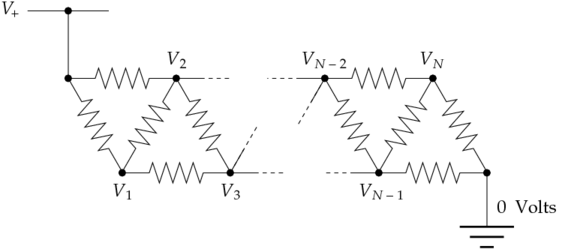

All the resistors have the same resistance $R$. The power rail at the top is at voltage $V_+=5$V. The problem is to find the voltages $V_1\ldots V_N$ at the internal points in the circuit.

Using Ohm's law and the Kirchhoff current law, which says that the total net current flow out of (or into) any junction in a circuit must be zero, we find that the voltages $V_1\ldots V_N$ satisfy the equations
$$\begin{align*}
3V_1 - V_2 - V_3 &= V_+\,, \\
-V_1 + 4V_2 - V_3 - V_4 &= V_+\,, \\
                        &\hspace{0.6em}\vdots \\
-V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V_{i+2} &= 0\,, \\
                        &\hspace{0.6em}\vdots \\
-V_{N-3} - V_{N-2} + 4V_{N-1} - V_N &= 0\,, \\
-V_{N-2} - V_{N-1} + 3V_N &= 0\,.
\end{align*}$$

- Write a program to solve for the values of the $V_i$ when there are $N=6$ internal junctions with unknown voltages.
> (Hint: All the values of $V_i$ should lie between zero and $5$V.  If they don't, something is wrong.)

- Now repeat your calculation for the case where there are $N=10\,000$ internal junctions. This part is not possible using the standard `solve` function. You'll need to use a different function from `scipy.linalg` or code your own. Rather than printing all $10\,000$ values, you should instead plot them.

In [6]:
%reset -f

Number of Juctions = 6
Voltages:
 [ 3.7254902   3.43137255  2.74509804  2.25490196  1.56862745  1.2745098 ]


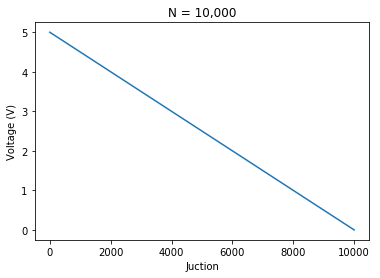

In [7]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def circuit_network(N,V_plus):
    
    diagonal = np.ones(N)*4
    diagonal[0] = 3
    diagonal[N-1] = 3

    topband1 = -1*np.ones(N)
    topband1[0] = 0
    topband2 = np.copy(topband1)
    topband2[1] = 0
    botband1 = np.flip(topband1,0)
    botband2 = np.flip(topband2,0)

    D = np.array([topband2,topband1,diagonal,botband1,botband2])

    v = np.zeros(N)
    v[0] = V_plus
    v[1] = V_plus

    x = la.solve_banded((2,2),D,v)
    return(x)

print("Number of Juctions = 6\nVoltages:\n",circuit_network(6,5))

y = circuit_network(10000,5)
x = np.arange(1,10001)

plt.plot(x,y)
plt.title("N = 10,000")
plt.xlabel("Juction")
plt.ylabel("Voltage (V)")
plt.show()

# Asymmetric Quantum Well

(Adapted from textbook exercise 6.9)

Quantum mechanics can be formulated as a matrix problem and solved on a computer using linear algebra methods.  Suppose, for example, we have a particle of mass $M$ in a one-dimensional quantum well of width $L$, but
not a square well like the examples you've probably seen before. Suppose instead that the potential $V(x)$ varies somehow inside the well:

We cannot solve such problems analytically in general, but we can solve them on the computer.

In a pure state of energy $E$, the spatial part of the wavefunction obeys the time-independent Schrodinger equation $\hat{H}\psi(x) = E\psi(x)$, where the Hamiltonian operator $\hat{H}$ is given by
$$\hat{H} = - {\hbar^2\over2M}\,{d^2\over d x^2} + V(x)\,.$$
For simplicity, let's assume that the walls of the well are infinitely high, so that the wavefunction is zero outside the well, which means it must *go to* zero at $x=0$ and $x=L$. In that case, we can define a matrix $\mathbf{H}$ with elements
$$\begin{align*}
H_{mn} &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \hat{H}\sin{\pi n x\over L} \>dx \nonumber\\
       &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \biggl[ - {\hbar^2\over2M}\,{d^2\over dx^2} + V(x) \biggr]
          \sin{\pi n x\over L} \>dx\,,
\end{align*}$$
Consequently,  Schrodinger's equation can be written in matrix form as $\mathbf{H}\boldsymbol{\psi} = E\boldsymbol{\psi}$, where $\boldsymbol{\psi}$ is the vector $(\psi_1,\psi_2,\ldots)$. Thus $\boldsymbol{\psi}$ is an eigenvector of the *Hamiltonian matrix* $\mathbf{H}$ with eigenvalue $E$. If we can calculate the eigenvalues of this matrix, then we know the allowed energies of the particle in the well.

- For the case $V(x)=ax/L$, evaluate the integral in $H_{mn}$ analytically and so find a general expression for the matrix element $H_{mn}$. Verify that the matrix is real and symmetric. You'll probably find it useful to know that
$$\int_0^L \sin {\pi m x\over L} \,\sin{\pi n x\over L} \>dx
  = \begin{cases}
      L/2 & \qquad\mbox{if $m=n$,} \\
      0          & \qquad\mbox{otherwise,}
    \end{cases}$$
and
$$\int_0^L x \sin{\pi m x\over L} \sin{\pi n x\over L} \>dx
  = \begin{cases}
      0 & \quad\mbox{if $m\ne n$ and both even or both odd,} \\
      {\displaystyle-\biggl({2L\over\pi}\biggr)^2{mn\over(m^2-n^2)^2}}
        & \quad\mbox{if $m\ne n$ and one is even, one is odd,} \\
      L^2/4 & \quad\mbox{if $m=n$.}
    \end{cases}$$


- Write a function to evaluate your expression for $H_{mn}$ for arbitrary $m$ and $n$ when the particle in the well is an electron, the well has width 0.5 nm, and $a=10\,$eV.  (The mass and charge of an electron are $9.1094\times10^{-31}\,$kg and $1.6022\times10^{-19}\,$C respectively.)

In [8]:
%reset -f

### Calculations

$$ \begin{align*}
H_{mn} &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \hat{H}\sin{\pi n x\over L} \>dx \nonumber\\
       &= {2\over L} \int_0^L \sin{\pi m x\over L} \biggl[ -{\hbar^2 \over 2M}{d^2\over dx^2}
       \biggl(\sin{n\pi x \over L} \biggr) + {ax \over L} \sin{n\pi x \over L}\biggr] \>dx\\
       &= {2\over L} \biggr({\hbar^2 n^2\pi^2 \over 2ML^2}\int_0^L \sin{m\pi x \over L} \sin{n\pi x \over L} \>dx \space + \space {a \over L} \int_0^L x\sin{m\pi x \over L} \sin{n\pi x \over L} \>dx \biggl)
       \end{align*}$$
       
   $$ H_{mn}  = \begin{cases}
      0 & \quad\mbox{if $m\ne n$ and both even or both odd,} \\\\
      {\displaystyle-{8a\over\pi^2}{mn\over(m^2-n^2)^2}}
        & \quad\mbox{if $m\ne n$ and one is even, one is odd,} \\\\
      {\displaystyle{\hbar^2 n^2\pi^2 \over 2ML^2} + {a\over 2}}  & \quad\mbox{if $m=n$.}
    \end{cases}$$

In [9]:
def Hamiltonian(m,n):
    h_bar = 6.626070040e-34/(2*np.pi) # J s 
    e = 1.6022e-19 # C
    M = 9.1094e-31 # kg
    L = 0.5e-9 # m 
    a = 10 # eV
   
    
    mm = m+1 #adjust indices to algebraic
    nn = n+1
    
    m_case = mm % 2
    n_case = nn % 2
        
    if mm == nn:
        H = (h_bar**2)*(nn**2)*(np.pi**2)/(2*M*L**2*e) + a/2
    elif m_case == n_case:
        H = 0
    else:
        H = (-1*8*a/np.pi**2)*(mm*nn/(mm**2 - nn**2)**2)
        
    return(H)

- The matrix $\mathbf{H}$ is in theory infinitely large, so we cannot calculate all its eigenvalues. But we can get a pretty accurate solution for the first few of them by cutting off the matrix after the first few elements. Use the function you wrote above to create a $10\times10$ array of the elements of $\mathbf{H}$ up to $m,n=10$. Calculate the eigenvalues of this matrix using the appropriate function from `scipy.linalg` and hence print out, in units of electron volts, the first ten energy levels of the quantum well, within this approximation. You should find, for example, that the ground-state energy of the system is around $5.84\,$eV.
> Hint: Bear in mind that matrix indices in Python start at zero, while the indices in standard algebraic expressions, like those above, start at one. You will need to make allowances for this in your program.)

In [24]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

M = 10
N = 10

H = np.zeros((M,N))

for m in range(0,M):
    for n in range(0,N):
        H[m,n] = Hamiltonian(m,n)

eigenvalues, eigenvectors = la.eigh(H)
print(eigenvalues)

[   5.83634271   11.18099554   18.66267148   29.14380421   42.65445878
   59.18437006   78.72815148  101.28390488  126.84938723  155.55286352]


- Modify your program to use a $100\times100$ array instead and again calculate the first ten energy eigenvalues.  Comparing with the values you calculated in the previous part, what do you conclude about the accuracy of the calculation?

In [33]:
M = 100
N = 100

H = np.zeros((M,N))

for m in range(0,M):
    for n in range(0,N):
        H[m,n] = Hamiltonian(m,n)
        
eigenvalues, eigenvectors = la.eigh(H)
print(eigenvalues[:10])

[   5.83634231   11.18099421   18.66266961   29.14379541   42.65444966
   59.18431748   78.72809965  101.28327394  126.84855488  155.42323894]


Type your conclusion about accuracy here: 
The size of your hamiltonian matrix should not have much of an effect on the calculated eigenvalues of your energy levels. 

- Now modify your program once more to calculate the wavefunction $\psi(x)$ for the ground state and the first two excited states of the well. Use your results to make a graph with three curves showing the probability density $|\psi(x)|^2$ as a function of $x$ in each of these three states. Pay special attention to the normalization of the wavefunction - it should satisfy the condition $\int_0^L |\psi(x)|^2 \>dx=1$.  Is this true of your wavefunction?

In [34]:
def wavefunction(x,L,eigenvector):
    psi = np.zeros(x.shape[0])
    for i,A in enumerate(eigenvector):
        psi = psi + A*np.sin((i+1)*np.pi*x/L)
        
    return(psi)

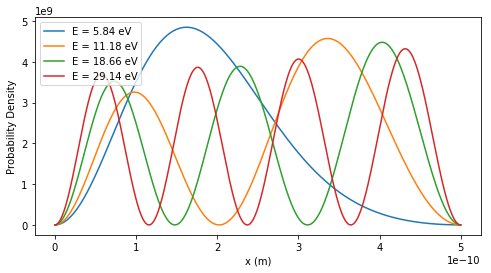

In [36]:
import scipy.integrate as si


L = 0.5e-9
x = np.linspace(0,L,1000)
psi1 = wavefunction(x,L,eigenvectors[:,0])
psi2 = wavefunction(x,L,eigenvectors[:,1])
psi3 = wavefunction(x,L,eigenvectors[:,2])
psi4 = wavefunction(x,L,eigenvectors[:,3])

A1 = np.sqrt(1/(si.trapz(psi1**2,x)))
A2 = np.sqrt(1/(si.trapz(psi2**2,x)))
A3 = np.sqrt(1/(si.trapz(psi3**2,x)))
A4 = np.sqrt(1/(si.trapz(psi4**2,x)))

p1 = A1**2*psi1**2
p2 = A2**2*psi2**2
p3 = A3**2*psi3**2
p4 = A4**2*psi4**2

plt.figure(figsize = (8,4))
plt.plot(x,p1,label = ("E = %.2lf eV" % eigenvalues[0]))
plt.plot(x,p2,label = ("E = %.2lf eV" % eigenvalues[1]))
plt.plot(x,p3,label = ("E = %.2lf eV" % eigenvalues[2]))
plt.plot(x,p4,label = ("E = %.2lf eV" % eigenvalues[3]))
plt.xlabel("x (m)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()